<a href="https://colab.research.google.com/github/20JUNE22/capstone2023/blob/main/RF_Rural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Food Desert

### Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Load the dataset
df = pd.read_excel("https://github.com/K-Gurleen/Urban/raw/main/rural_data.xlsx")
df.head()

,Urban,FoodDesert,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,0,0,0.000000,0.995635,4.939145,2.911690,2.534026,3.429914,2.445604,1.230449,0.00000,1.447158,1.851258,1.763428,1.838849,2.158362
1,0,0,0.000000,1.167317,4.915584,3.463893,3.025715,3.941760,3.142389,1.792392,0.90309,1.698970,2.274158,2.204120,2.298853,2.547775
2,0,0,0.096910,1.033424,4.877181,3.179552,2.800029,3.684486,2.832509,1.322219,0.60206,1.176091,2.096910,1.986772,1.991226,2.532754
3,0,1,0.130334,1.374748,4.766428,2.875640,2.541579,3.347135,2.781037,0.602060,0.00000,1.278754,1.681241,1.602060,1.000000,2.167317
4,0,1,0.298853,1.399674,4.675182,2.875640,2.693727,3.158965,3.257918,0.477121,0.00000,1.176091,1.732394,1.602060,2.431364,2.363612


In [ ]:
# Divided urban data into the independent and dependent variables
X = df.drop(['FoodDesert', 'Urban'], axis = 1) # all independent
y = df['FoodDesert']  # Select the 'FoodDesert' column as the dependent variable
X.head()

,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,0.000000,0.995635,4.939145,2.911690,2.534026,3.429914,2.445604,1.230449,0.00000,1.447158,1.851258,1.763428,1.838849,2.158362
1,0.000000,1.167317,4.915584,3.463893,3.025715,3.941760,3.142389,1.792392,0.90309,1.698970,2.274158,2.204120,2.298853,2.547775
2,0.096910,1.033424,4.877181,3.179552,2.800029,3.684486,2.832509,1.322219,0.60206,1.176091,2.096910,1.986772,1.991226,2.532754
3,0.130334,1.374748,4.766428,2.875640,2.541579,3.347135,2.781037,0.602060,0.00000,1.278754,1.681241,1.602060,1.000000,2.167317
4,0.298853,1.399674,4.675182,2.875640,2.693727,3.158965,3.257918,0.477121,0.00000,1.176091,1.732394,1.602060,2.431364,2.363612


### Method selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load your data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the models you want to compare
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=123)),
    ('Decision Tree', DecisionTreeClassifier(random_state=123)),
    ('Random Forest', RandomForestClassifier(random_state=123)),
    ('XGBoost', XGBClassifier(random_state=123)),
    ('LightGBM', LGBMClassifier(random_state=123)),
    ('SVM', SVC(random_state=123)),
    ('KNN', KNeighborsClassifier())
]

# Train and evaluate each model
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance using common metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print()

Logistic Regression Results:
Accuracy: 0.811
Precision: 0.523
Recall: 0.105
F1 Score: 0.175

Decision Tree Results:
Accuracy: 0.733
Precision: 0.310
Recall: 0.327
F1 Score: 0.318

Random Forest Results:
Accuracy: 0.820
Precision: 0.638
Recall: 0.137
F1 Score: 0.225

XGBoost Results:
Accuracy: 0.813
Precision: 0.525
Recall: 0.226
F1 Score: 0.316

LightGBM Results:
Accuracy: 0.816
Precision: 0.555
Recall: 0.185
F1 Score: 0.278

SVM Results:
Accuracy: 0.811
Precision: 0.636
Recall: 0.021
F1 Score: 0.041

KNN Results:
Accuracy: 0.799
Precision: 0.445
Recall: 0.214
F1 Score: 0.289



> Random Forest

In [ ]:
# Print the model's performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_performance_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")


### Random Forest baseline model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the Random Forest model
rf_base= RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model to the training data
rf_base.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_base.predict(X_test)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred)


# from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
# Calculate the classification report
# report = classification_report(y_test, y_pred)
# print("Classification Report:")
# print(report)

# # Calculate the ROC-AUC score
# roc_auc = roc_auc_score(y_test, y_pred)
# print(f"ROC-AUC Score: {roc_auc:.3f}")

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)

# # Plot the ROC curve
# plot_roc_curve(rf, X_test, y_test) # use the input data instead of the predicted labels
# plt.show()

Accuracy: 0.820
Precision: 0.638
Recall: 0.137
F1 Score: 0.225


Accuracy: the baseline model has an accuracy of 0.636, which means that it correctly classified 63.6% of the test set samples.

Precision:the baseline model has a precision of 0.722, which means that when it predicted a positive label, it was correct 72.2% of the time.

Recall: the baseline model has a recall of 0.406, which means that it correctly identified only 40.6% of the actual positive samples.

Based on these results, it appears that the baseline model has room for improvement, particularly in terms of recall. A low recall score means that the model is failing to identify many of the areas that are actually food deserts.

### Feature selection

#### Feature importance

In [ ]:
# view the feature scores
feature_scores = pd.Series(rf_base.feature_importances_, index=X_train.columns).sort_values(ascending=False)

log10_TractBlack            0.088291
log10_MedianFamilyIncome    0.087650
log10_TractAIAN             0.083142
log10_TractAsian            0.081903
log10_TractSNAP             0.078639
log10_TractWhite            0.077947
log10_TractSeniors          0.074140
log10_PovertyRate           0.073951
log10_TractKids             0.071689
log10_TractHispanic         0.069168
log10_TractOMultir          0.068800
log10_TractHUNV             0.068687
log10_PCTGQTRS              0.048968
log10_TractNHOPI            0.027026
dtype: float64


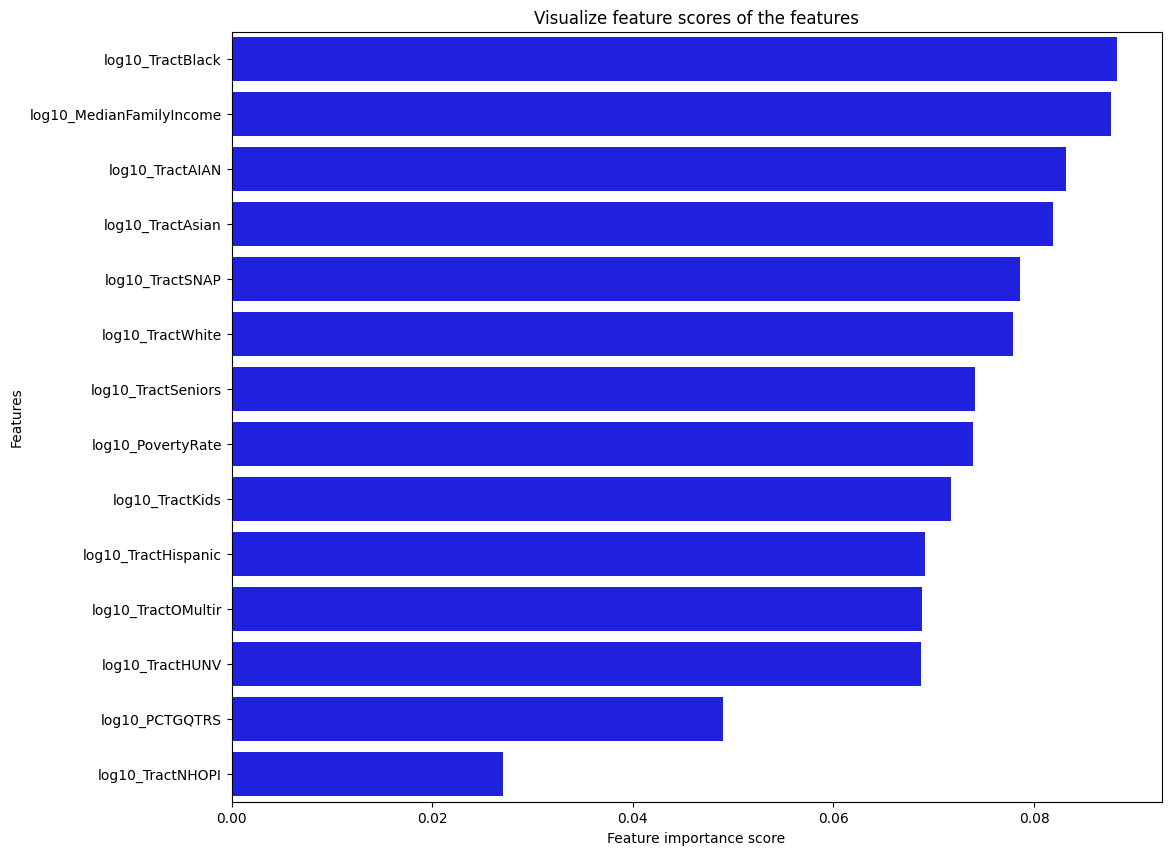

In [ ]:
print(feature_scores)

# view a bar plot
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, color='blue')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
# Store the initial feature scores
feature_scores = pd.Series(rf_base.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Initialize variables to track the best accuracy and the corresponding feature set
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1_score = 0
best_feature_set = []

# Create a list to store the dropped features and accuracies
dropped_features = []
accuracies = []
precisions = []
recalls = []
f1_scores = []


# Iterate over each feature to drop
for feature in feature_scores.index:
    # Create a new feature set by dropping the current feature
    selected_features = [f for f in X_train.columns if f not in [feature]]
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    # Train a new Random Forest model with the selected features
    rf = RandomForestClassifier(n_estimators=100, random_state=123)
    rf.fit(X_train_subset, y_train)

    # Evaluate the model on the test set
    y_pred = rf.predict(X_test_subset)

    # Check if the current accuracy is better than the previous best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        best_f1_score = f1
        best_feature_set = selected_features

    # Store the dropped feature and its corresponding accuracy
    dropped_features.append(feature)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

In [ ]:
# Print the dropped features
dropped_features = [col for col in X_train.columns if col not in best_feature_set]

# Print the metrics and the corresponding feature set
print("Dropped features:", dropped_features)
print_performance_metrics(y_test, y_pred)
# print("Best feature set:", best_feature_set)

Dropped features: ['log10_TractBlack']
Accuracy: 0.816
Precision: 0.578
Recall: 0.135
F1 Score: 0.219


> dropped less important features, the model doesn't shows significant improvement.

####  SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=123))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

# print(selected_feat)

# Create a new dataset with the selected features
X_train3 = X_train[selected_feat]
X_test3 = X_test[selected_feat]

# Train a new Random Forest model with the selected features
rf3= RandomForestClassifier(n_estimators=100, random_state=123)
rf3.fit(X_train3, y_train)

# Evaluate the model on the test set
y_pred3 = rf3.predict(X_test3)

In [ ]:
# Print the dropped features
dropped_features = [col for col in X_train.columns if col not in selected_feat]
print("Dropped features:", dropped_features)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred3)

Dropped features: ['log10_PCTGQTRS', 'log10_TractNHOPI', 'log10_TractOMultir', 'log10_TractHispanic', 'log10_TractHUNV']
Accuracy: 0.814
Precision: 0.553
Recall: 0.143
F1 Score: 0.227


> Using the selected feature does not improve the performance of the model.

#### Recursive feature elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
# create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=123)

# create the RFE model and select top 5 features
rfe = RFE(estimator=rf, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

# # summarize the selection of the attributes
# print("Selected Features:", list(X_train.columns[rfe.support_]))

# Evaluate the model on the test set
y_pred4 = rfe.predict(X_test)

In [ ]:
# Print the dropped features
dropped_features = [col for col in X_train.columns if col not in list(X_train.columns[rfe.support_])]
print("Dropped features:", dropped_features)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred4)

Dropped features: ['log10_PCTGQTRS', 'log10_PovertyRate', 'log10_TractKids', 'log10_TractBlack', 'log10_TractAsian', 'log10_TractNHOPI', 'log10_TractAIAN', 'log10_TractOMultir', 'log10_TractHUNV']
Accuracy: 0.809
Precision: 0.500
Recall: 0.106
F1 Score: 0.175


> REF does not improve the model. Since the three feature selections did not improve the model's performance, I will proceed to the next step of hyperparameter tuning with all features.

In [ ]:
# Create a Random Forest Classifier with balanced class weights
rf_bal = RandomForestClassifier(class_weight='balanced', random_state=123)

# Fit the model on the training data
rf_bal.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_bal.predict(X_test)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred)


Accuracy: 0.813
Precision: 0.556
Recall: 0.112
F1 Score: 0.187


### Under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Create an instance of the RandomUnderSampler
undersampler = RandomUnderSampler()

# Verify the class distribution before undersampling
print("Class distribution before undersampling:")
print(y_train.value_counts())

# Apply undersampling to the training data
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Verify the class distribution after undersampling
print("Class distribution after undersampling:")
print(pd.Series(y_train_undersampled).value_counts())


Class distribution before undersampling:
0    11272
1     2498
Name: FoodDesert, dtype: int64
Class distribution after undersampling:
0    2498
1    2498
Name: FoodDesert, dtype: int64


####  New Baseline with undersampling

In [ ]:
# Train a new model on the undersampled data
rf_undersampled = RandomForestClassifier(random_state=123)
rf_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Evaluate the model on the original test data
y_pred_undersampled = rf_undersampled.predict(X_test)
print_performance_metrics(y_test, y_pred_undersampled)


Accuracy: 0.672
Precision: 0.337
Recall: 0.739
F1 Score: 0.462


#### Feature Selection

In [ ]:
# Store the initial feature scores
feature_scores = pd.Series(rf_undersampled.feature_importances_, index=X_train_undersampled.columns).sort_values(ascending=False)

# Initialize variables to track the best accuracy and the corresponding feature set
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1_score = 0
best_feature_set = []

# Create a list to store the dropped features and accuracies
dropped_features = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Iterate over each feature to drop
for feature in feature_scores.index:
    # Create a new feature set by dropping the current feature
    selected_features = [f for f in X_train_undersampled.columns if f not in [feature]]
    X_train_subset = X_train_undersampled[selected_features]
    X_test_subset = X_test[selected_features]

    # Train a new Random Forest model with the selected features
    rf = RandomForestClassifier(n_estimators=100, random_state=123)
    rf.fit(X_train_subset, y_train_undersampled)

    # Evaluate the model on the test set
    y_pred = rf.predict(X_test_subset)

    # Calculate performance metrics for the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Check if the current accuracy is better than the previous best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        best_f1_score = f1
        best_feature_set = selected_features

    # Store the dropped feature and its corresponding accuracy
    dropped_features.append(feature)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)


In [ ]:
# Print the dropped features
dropped_features = [col for col in X_train.columns if col not in best_feature_set]

# Print the metrics and the corresponding feature set
print("Dropped features:", dropped_features)
print_performance_metrics(y_test, y_pred)
# print("Best feature set:", best_feature_set)

Dropped features: ['log10_TractNHOPI']
Accuracy: 0.676
Precision: 0.340
Recall: 0.737
F1 Score: 0.465


### Hyperparameter tuning

In [ ]:
# evaluating the performance of a classification model on both training and testing datasets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred):.3f}")
        print("__________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred):.3f}")
        print("_________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### Randomized Search Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter search space
n_estimators = [int(x) for x in np.linspace(start=50, stop=500, num=50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 7, num=1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Create the base random forest classifier
rf_clf = RandomForestClassifier(random_state=123)

# Perform randomized search cross-validation
rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='accuracy',
    param_distributions=random_grid,
    n_iter=200,
    cv=5,
    verbose=1,
    random_state=123,
    n_jobs=-1
)

# Fit the randomized search CV on the undersampled data
rf_cv.fit(X_train_undersampled, y_train_undersampled)
rf_best_params = rf_cv.best_params_
print(f"Best parameters: {rf_best_params}")

# Create a random forest classifier with the best parameters
rf_clf_best = RandomForestClassifier(**rf_best_params, random_state=123)

# Fit the classifier on the undersampled data
rf_clf_best.fit(X_train_undersampled, y_train_undersampled)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 490, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


RandomForestClassifier(max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=490, random_state=123)

In [ ]:
# Save the model to a file
from joblib import dump

dump(rf_clf_best, 'rf_rural.pkl')

['rf_rural.pkl']

In [ ]:
# Print the performance metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
y_pred5 = rf_clf_best.predict(X_test)
print_performance_metrics(y_test, y_pred5)

print_score(rf_clf_best, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf_best, X_train, y_train, X_test, y_test, train=False)

Accuracy: 0.675
Precision: 0.340
Recall: 0.743
F1 Score: 0.467
Train Result:
Accuracy Score: 0.788
__________________________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.998806     0.460911  0.787945      0.729858      0.901227
recall         0.741838     0.995997  0.787945      0.868917      0.787945
f1-score       0.851354     0.630193  0.787945      0.740773      0.811233
support    11272.000000  2498.000000  0.787945  13770.000000  13770.000000
__________________________________________________________
Confusion Matrix: 
 [[8362 2910]
 [  10 2488]]

Test Result:
Accuracy Score: 0.675
_________________________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.915711    0.340056  0.675283     0.627883      0.805696
recall        0.659246    0.743161  0.675283     0.701204      0.675283
f1-sc

> The rf_clf_best: accuracy 0.821.

>Best parameters:'n_estimators': 224, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True


### Validation

In [ ]:
# Print the performance metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
y_pred5 = rf_clf_best.predict(X_test)
print_performance_metrics(y_test, y_pred5)

print_score(rf_clf_best, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf_best, X_train, y_train, X_test, y_test, train=False)

Accuracy: 0.675
Precision: 0.340
Recall: 0.743
F1 Score: 0.467
Train Result:
Accuracy Score: 0.788
__________________________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.998806     0.460911  0.787945      0.729858      0.901227
recall         0.741838     0.995997  0.787945      0.868917      0.787945
f1-score       0.851354     0.630193  0.787945      0.740773      0.811233
support    11272.000000  2498.000000  0.787945  13770.000000  13770.000000
__________________________________________________________
Confusion Matrix: 
 [[8362 2910]
 [  10 2488]]

Test Result:
Accuracy Score: 0.675
_________________________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.915711    0.340056  0.675283     0.627883      0.805696
recall        0.659246    0.743161  0.675283     0.701204      0.675283
f1-sc

> The final model is rf_clf_best with accuracy of 0.821. not overfitting.


The accuracy score is 0.821, which means that the model classified 82.1% of the instances correctly.

The precision for class 1 is 0.816, which means that of all the instances predicted as class 1, 81.6% are actually class 1.

The recall for class 1 is 0.677, which means that of all the instances that are actually class 1, the model correctly identified 67.7% of them.

The F1-score is 0.740 which is not better than other model.


### Visualization

In [ ]:
# Load the saved model from a file
from joblib import load
fd_rf= load('rf_rural.pkl')

Accuracy: 0.675
Precision: 0.340
Recall: 0.743
F1 Score: 0.467


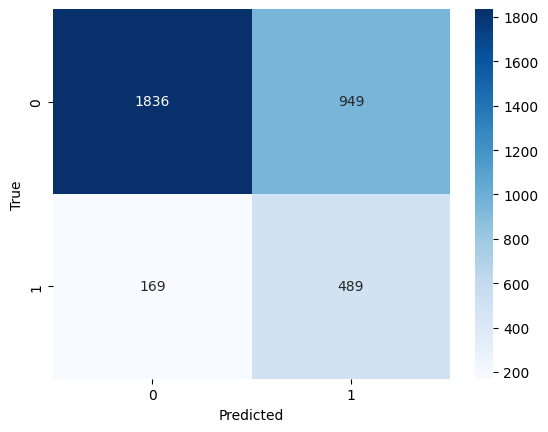

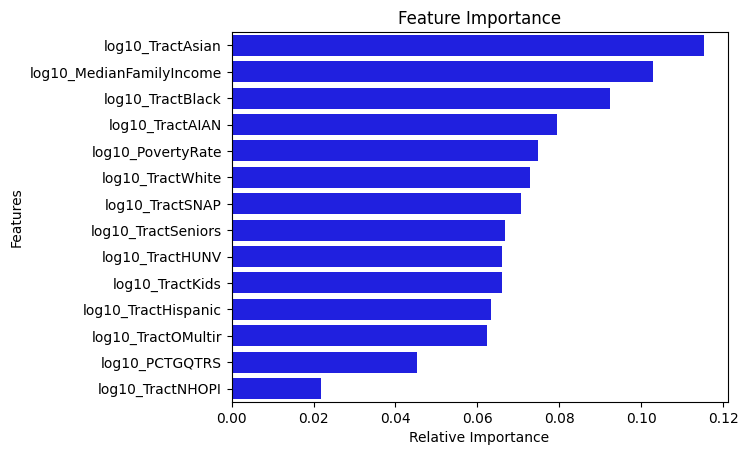

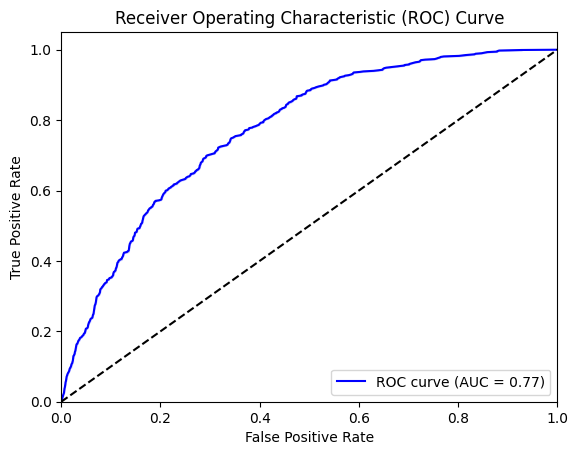

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Evaluate the model's performance using common metrics
y_pred = fd_rf.predict(X_test)
# Print the model's performance metrics
print_performance_metrics(y_test, y_pred)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance plot
importances = fd_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in fd_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

sns.barplot(x=importances[indices], y=X.columns[indices], color="b")
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# ROC curve
y_pred_prob = fd_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
sns.lineplot(x=fpr, y=tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


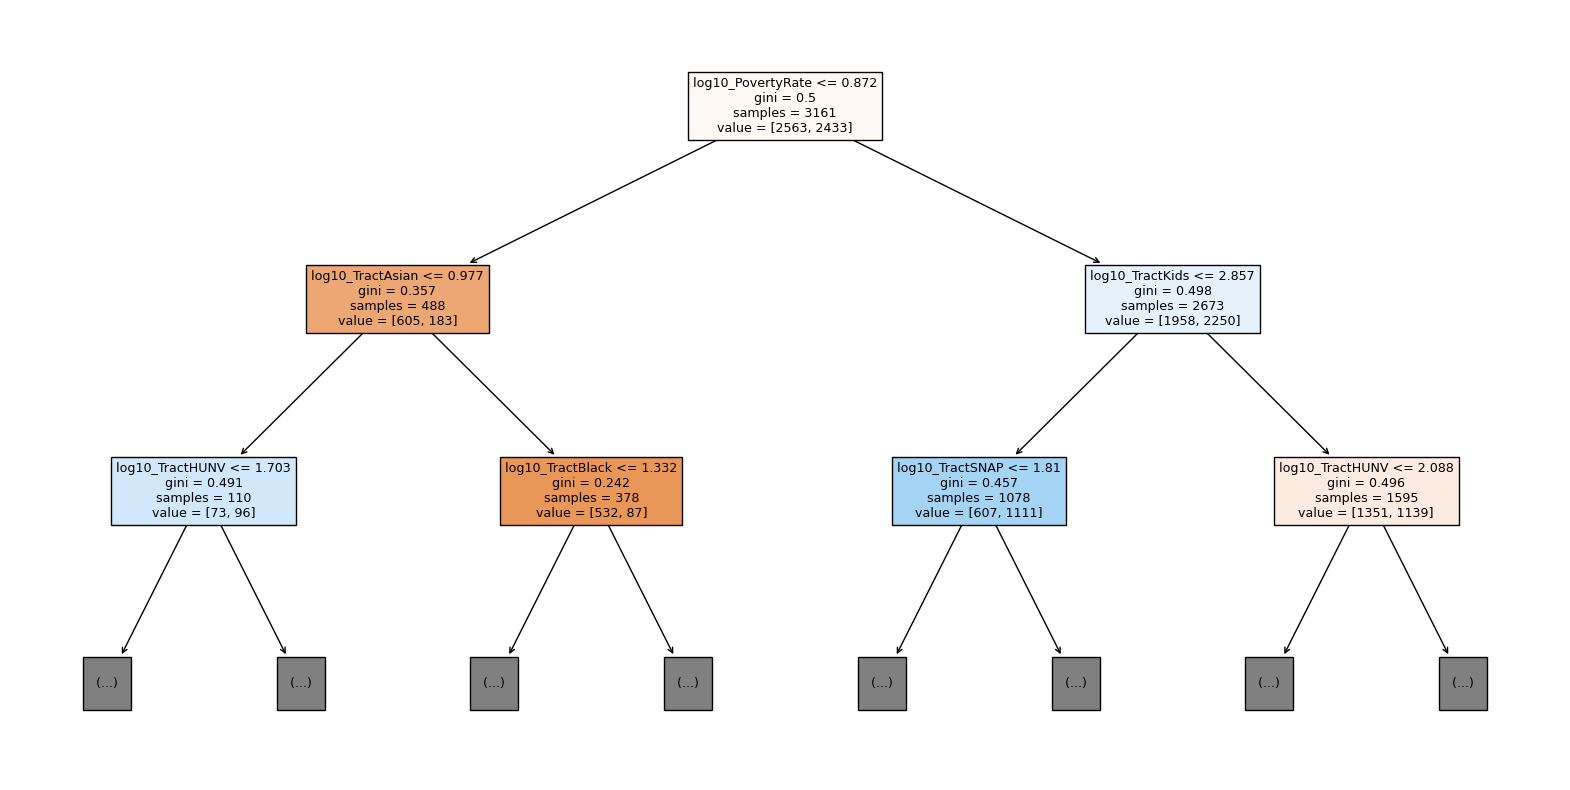

In [ ]:
from sklearn.tree import plot_tree

# Select one of the decision tree estimators from the random forest
tree = fd_rf.estimators_[11]

# Plot the selected decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns,  max_depth=2)
plt.show()